## school / category
#### 依學校or 類別分類 (分類方式參見word檔)

In [2]:
import pandas as pd

department_ds = pd.read_csv('108cat2.csv', encoding="utf-8", dtype=str) 

depname_abbr = department_ds['depname_abbr'] 
des_rank1 = department_ds['des_class_rank'] 
basic_rank = department_ds['basic_class_rank'] 
dep_color = department_ds['school_group_my']    #school:學校, category:系所類別

ndep = department_ds.shape[0] 

department_ds.head(10)

,school_id,dep_id,school_name,department_name,depname_abbr,school_group_my,category_id,category_name,basic_class_rank,basic_preference_score,des_class_rank,new_des_score
0,1,1302,國立臺灣大學,土木工程學系,臺大土木,1,7,工程、製造及營建,17,2.122603,31,394.6
1,13,13102,國立交通大學,土木工程學系,交大土木,1,7,工程、製造及營建,51,1.21494,77,369.8
2,4,4142,國立成功大學,土木工程學系,成大土木,1,7,工程、製造及營建,55,1.169678,84,362.75
3,3,3172,國立中興大學,土木工程學系,中興土木,2,7,工程、製造及營建,107,0.512117,151,330.7780532
4,16,16092,國立中央大學,土木工程學系,中央土木,2,7,工程、製造及營建,188,0.175088,124,344.4216339
5,15,15292,逢甲大學,土木工程學系,逢甲土木,4,7,工程、製造及營建,223,0.063388,273,280.9900399
6,150,150042,國立宜蘭大學,土木工程學系,宜蘭土木,3,7,工程、製造及營建,230,0.05608,240,292.9252266
7,8,8112,中原大學,土木工程學系,中原土木,4,7,工程、製造及營建,237,0.031887,278,279.6207572
8,14,14372,淡江大學,土木工程學系,淡江土木,4,7,工程、製造及營建,251,0.001761,322,262.2041055
9,58,58212,國立暨南國際大學,土木工程學系,暨南土木,3,7,工程、製造及營建,322,-0.439874,310,270.2664968


In [3]:
from matplotlib.font_manager import FontProperties
from matplotlib import pyplot as plt
import numpy as np
ChineseFont2 = FontProperties(fname='C:\\Windows\\Fonts\\msjh.ttc')

category_df = dep_color.drop_duplicates().sort_values()
ncategory = category_df.shape[0]
colors = plt.cm.rainbow(np.linspace(0, 1, ncategory))

for i in range(ndep):
    dep_color[i] = int(dep_color[i])
    dep_color[i] = colors[ dep_color[i]-1 ]

[[0.7455907]]
[47.19292463]
11 金門土木工管
15 文化大氣
41 宜蘭化工材工
43 中央化工材工
73 淡江化學材料
95 臺師光電
108 臺師地球
139 中興物理光電物理
144 東華物理物理
150 逢甲建築學士班
155 淡江建築
156 聯合建築
171 淡江航空太空
175 中原商業設計產品設計
205 彰師資工
232 臺體運動資訊傳播(資訊)
269 清大電機乙
326 臺師機電工程
342 中興應用經濟
347 中山應用數學


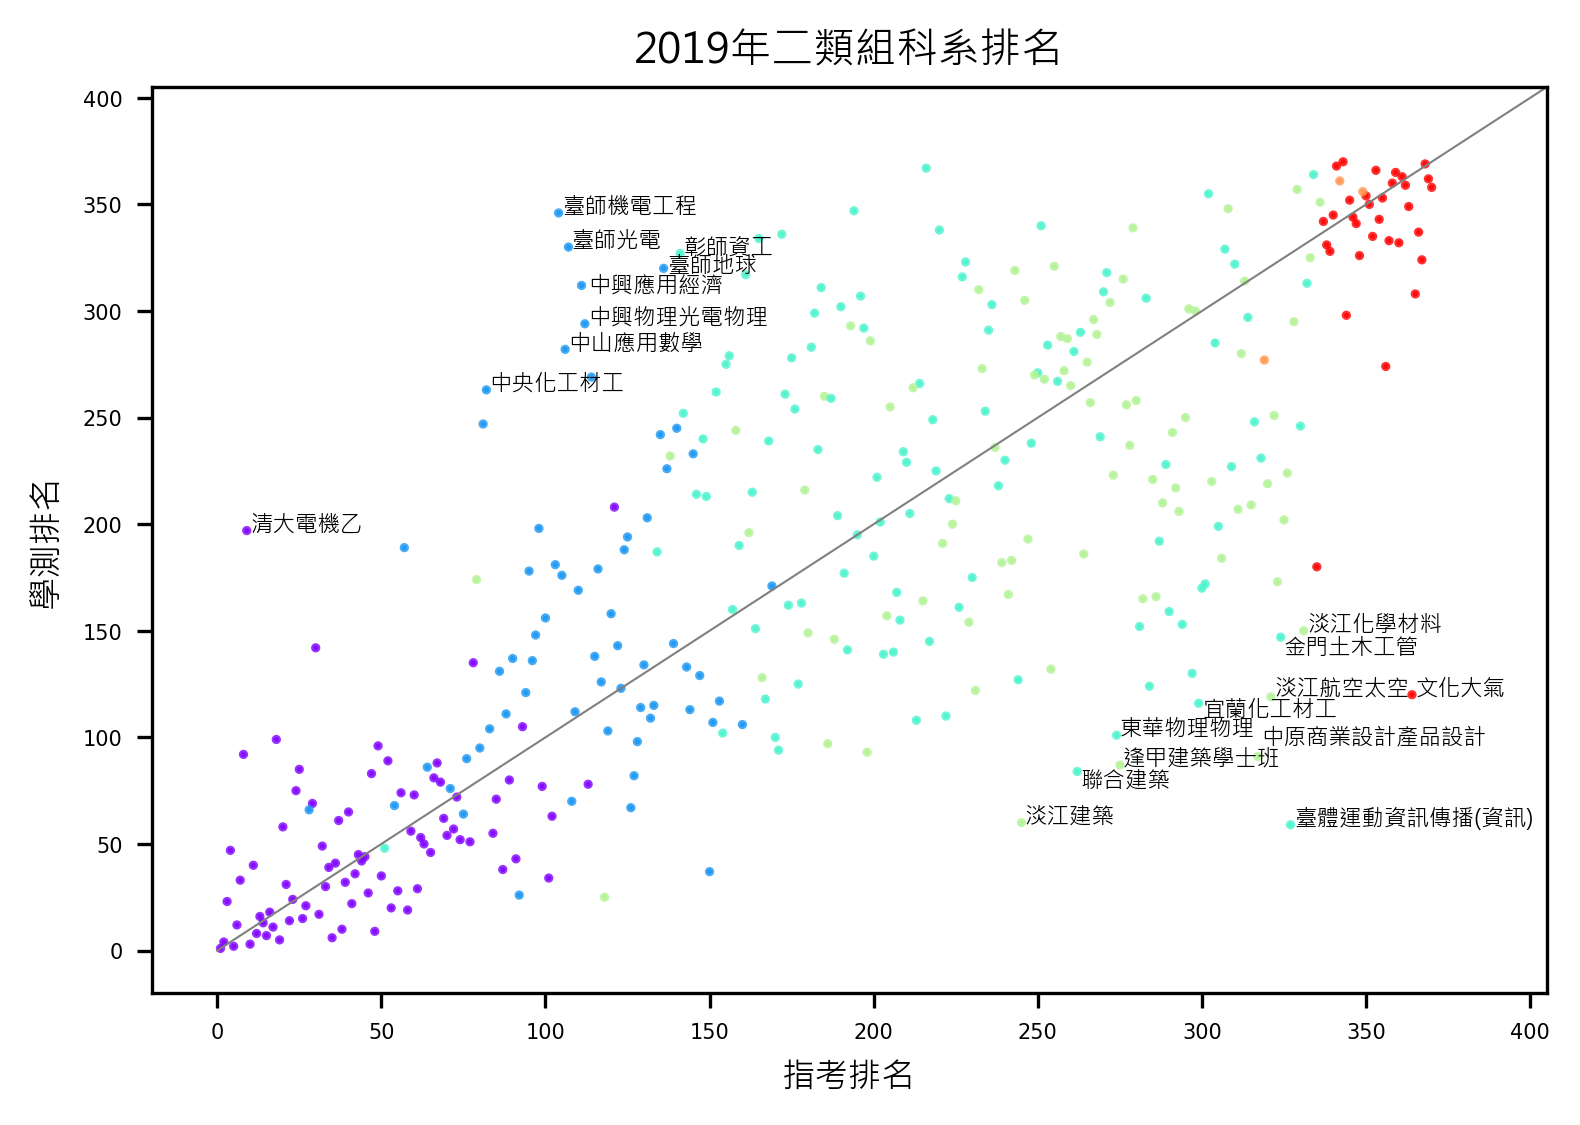

In [10]:
from sklearn.linear_model import LinearRegression

def plot_result(id_, x, y, name, colorid, addname = True, fontsize = 15, markersize = 20,
                dpi = 200, datascale = 1.0, title = None):
    
    for i in range(ndep):
        x[i] = int(x[i]) * datascale
        y[i] = int(y[i]) * datascale
    
    fig, ax = plt.subplots(dpi = dpi)
    if title != None:
        ax.set_title(title, fontproperties=ChineseFont2,fontsize=10)
    ax.scatter(x, y, s = markersize, color = colorid, alpha = 0.8)
    ax.set_xlabel('指考排名', fontproperties=ChineseFont2,fontsize=8)
    ax.set_ylabel('學測排名', fontproperties=ChineseFont2,fontsize=8)
    plt.xticks(fontsize=5)
    plt.yticks(fontsize=5)
    
    #linear regression 
    lm = LinearRegression()
    x_array = np.array(x)
    y_array = np.array(y)
    lm.fit(np.reshape( x_array, (len(x_array), 1)), np.reshape(y_array, (len(y_array), 1)))
    
    print(lm.coef_)
    print(lm.intercept_)
    #to_be_predicted = np.array([ndep])
    #predicted_y = lm.predict(np.reshape(to_be_predicted, (len(to_be_predicted), 1)))
    #plt.plot(x_array, lm.predict(np.reshape(x_array, (len(x_array), 1))), color='gray', linewidth=0.5)
    ax.set_xlim([-20, 405])
    ax.set_ylim([-20, 405])
    xaxis= np.linspace(0,800)    
    plt.plot(xaxis, xaxis, color='gray', linewidth=0.5)
    
   #text
    nameshift = 1
    if addname == True:
        for i, txt in enumerate(name):
            b = y[i] - x[i]         #y = ax + b  b = y - ax   #y = 0.5x +b
            if( b > 170 or b <-170 ):
                print(i,name[i])
                if int(i) == 342:
                    ax.annotate( name[i], (int(x[i])+1 + nameshift, int(y[i])-3), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                elif int(i) == 11:
                    ax.annotate( name[i], (int(x[i]) + nameshift, int(y[i])-8), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                elif int(i) == 108:
                    ax.annotate( name[i], (int(x[i]) + nameshift, int(y[i])-2), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                elif int(i) == 158:
                    ax.annotate( name[i], (int(x[i]) + nameshift, int(y[i])-6), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                elif int(i) == 41:
                    ax.annotate( name[i], (int(x[i]) + nameshift, int(y[i])-6), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                elif int(i) == 145:
                    ax.annotate( name[i], (int(x[i]) + nameshift, int(y[i])-2), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                elif int(i) == 156:
                    ax.annotate( name[i], (int(x[i]) + nameshift, int(y[i])-7), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                elif int(i) == 171:
                    ax.annotate( name[i], (int(x[i]) + nameshift, int(y[i])+1), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                elif int(i) == 175:
                    ax.annotate( name[i], (int(x[i]) + nameshift, int(y[i])+6), size = fontsize, color = 'black', fontproperties=ChineseFont2)
                else:
                    ax.annotate( name[i], (int(x[i]) + nameshift, int(y[i])), size = fontsize, color = 'black', fontproperties=ChineseFont2)      
    
    plt.savefig('result/group2-'+str(id_)+'.png')
    plt.show()
    
    
plot_result(1, des_rank1, basic_rank, depname_abbr, dep_color, addname = True, fontsize = 5.4, 
        title = '2019年二類組科系排名', markersize= 1.5, dpi = 300, datascale = 1)

### legend

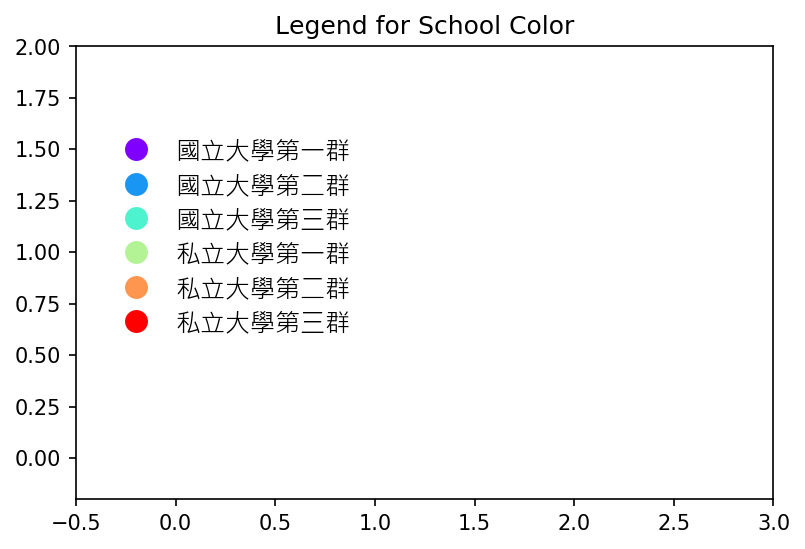

In [35]:
#schoolName = ['台清交成政','國立中','國立後','私立前','私立中','私立後']
schoolName = ['國立大學第一群','國立大學第二群','國立大學第三群','私立大學第一群','私立大學第二群','私立大學第三群']
fig, ax = plt.subplots(dpi = 150)
ax.set_title("Legend for School Color")
ax.set_xlim([-0.5, 3])
ax.set_ylim([-0.2, 2])
for i in range(6):
    thecolor = colors[i] 
    x = -0.2
    y = 1.5-i/6  
    ax.scatter(x, y, s = 100, color = thecolor)    
    ax.annotate(schoolName[i], (x+0.2, y-0.05), fontsize=12,  fontproperties=ChineseFont2)
plt.show()



[[0.7455907]]
[47.19292463]
11 金門土木工管
15 文化大氣
41 宜蘭化工材工
43 中央化工材工
73 淡江化學材料
95 臺師光電
108 臺師地球
139 中興物理光電物理
144 東華物理物理
150 逢甲建築學士班
155 淡江建築
156 聯合建築
171 淡江航空太空
175 中原商業設計產品設計
205 彰師資工
232 臺體運動資訊傳播(資訊)
269 清大電機乙
326 臺師機電工程
342 中興應用經濟
347 中山應用數學


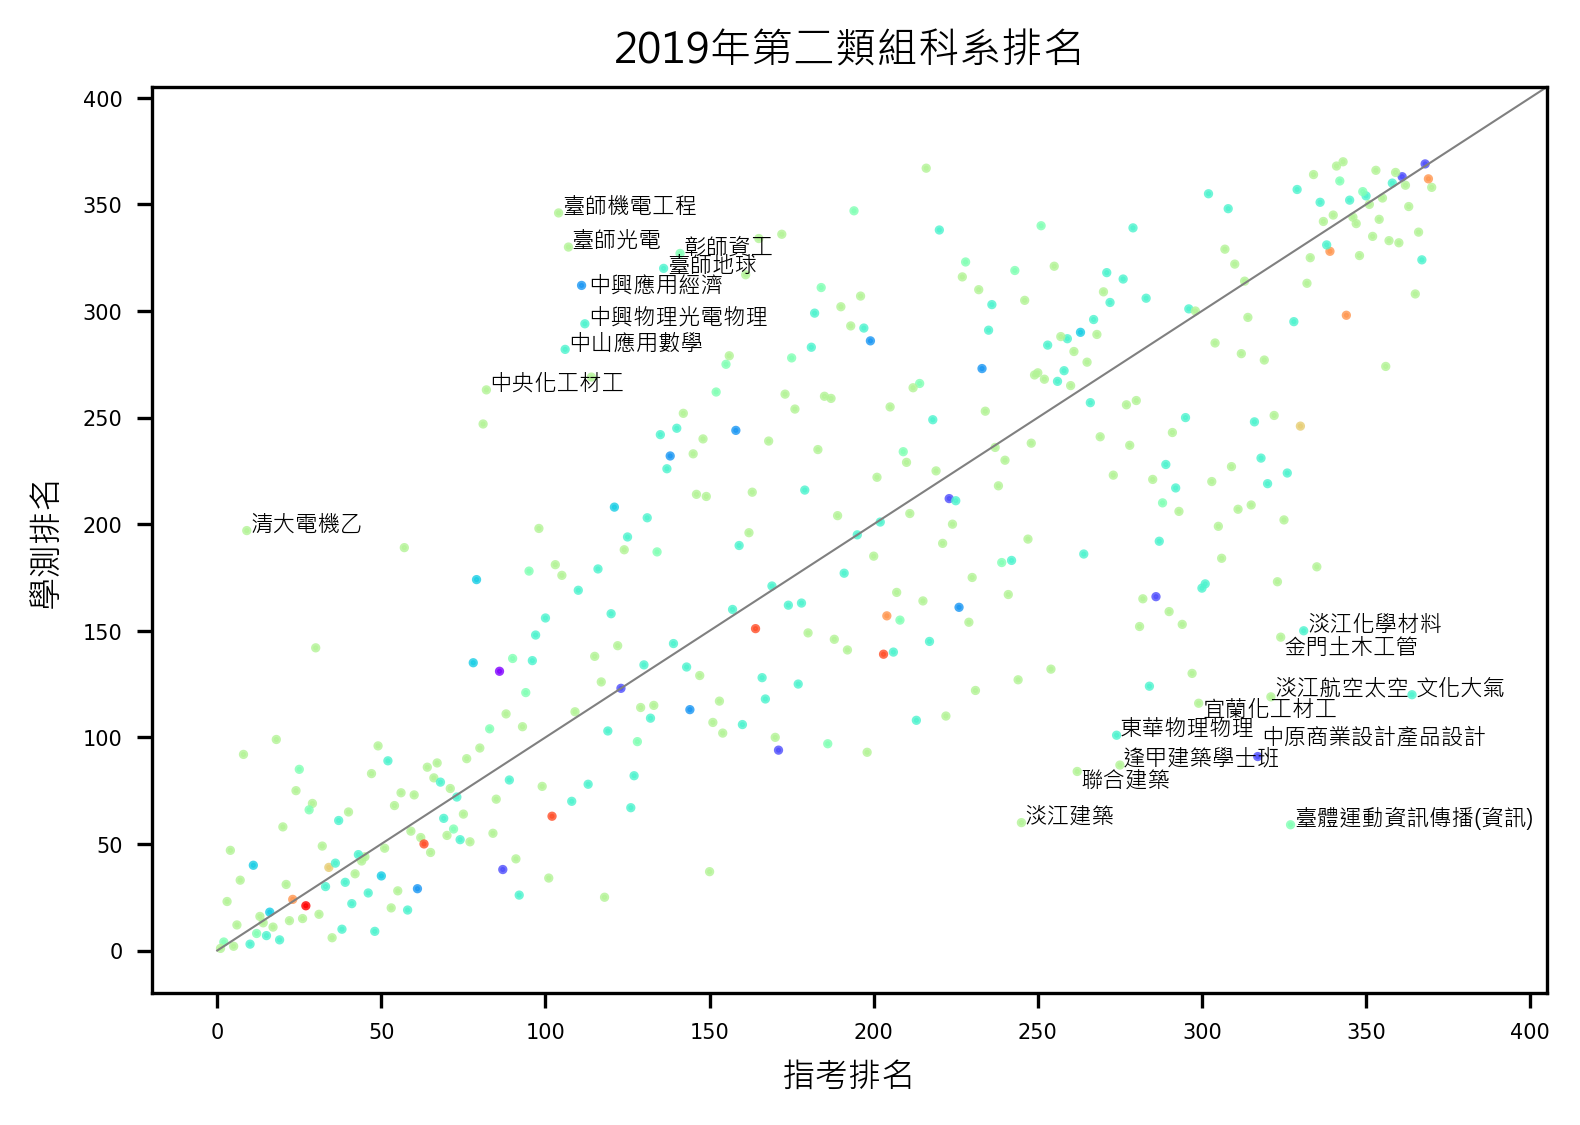

In [11]:
import pandas as pd

department_ds = pd.read_csv('108cat2.csv', encoding="utf-8", dtype=str) 
depname_abbr = department_ds['depname_abbr'] 
des_rank1 = department_ds['des_class_rank'] 
basic_rank = department_ds['basic_class_rank'] 
dep_color = department_ds['category_id']    #school:學校, category:系所類別
ndep = department_ds.shape[0] 


category_df = dep_color.drop_duplicates().sort_values()
ncategory = category_df.shape[0]
colors = plt.cm.rainbow(np.linspace(0, 1, ncategory))

for i in range(ndep):
    if dep_color[i]=='99':
        dep_color[i]=11
    dep_color[i] = colors[ int(dep_color[i])-1 ]

plot_result(2, des_rank1, basic_rank, depname_abbr, dep_color, addname = True, fontsize = 5.4, 
        title = '2019年第二類組科系排名', markersize= 1.5, dpi = 300, datascale = 1)

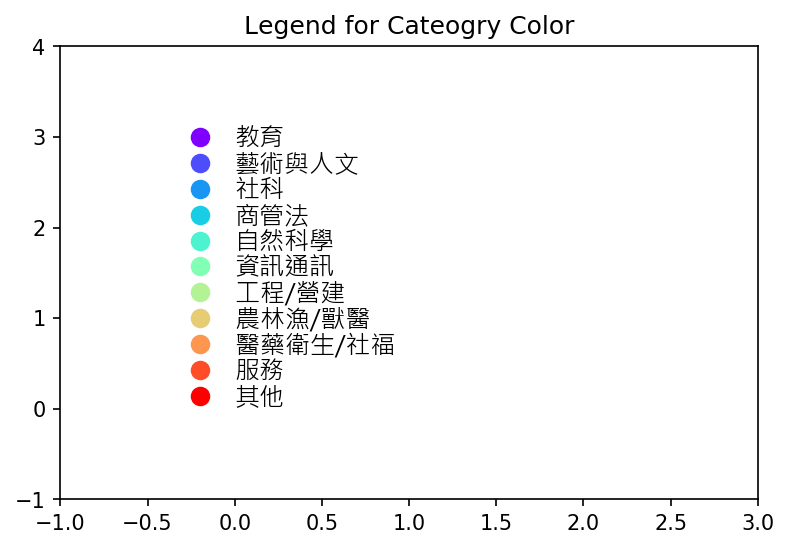

In [12]:
#categoryName = ['電機', '資訊相關', '理學相關', '建築', '土木', '航太、商船', '化學相關', '其他']
categoryName = ['教育','藝術與人文','社科','商管法','自然科學','資訊通訊','工程/營建 ','農林漁/獸醫 ','醫藥衛生/社福 ','服務','其他']
fig, ax = plt.subplots(dpi = 150)
ax.set_title("Legend for Cateogry Color")

for i in range(category_df.shape[0]):
    thecolor = colors[i]
    ax.set_xlim([-1, 3])
    ax.set_ylim([-1, 4])
    x = -0.2
    y = 3-i/3.5
    ax.scatter(x, y, s = 70, color = thecolor)    
    ax.annotate(categoryName[i], (x+0.2, y-0.1), fontsize=12,  fontproperties=ChineseFont2)
plt.show()



[[0.74017058]]
[48.06844291]
11 金門土木工管
15 文化大氣
41 中央化工材工
42 宜蘭化工材工
73 淡江化學材料
95 臺師光電
107 臺師地球
137 中興物理光電物理
144 東華物理物理
149 逢甲建築學士班
154 聯合建築
158 淡江建築
170 淡江航空太空
174 中原商業設計產品設計
194 彰師資工
231 臺體運動資訊傳播(資訊)
267 清大電機乙
324 臺師機電工程
341 中興應用經濟
344 中山應用數學


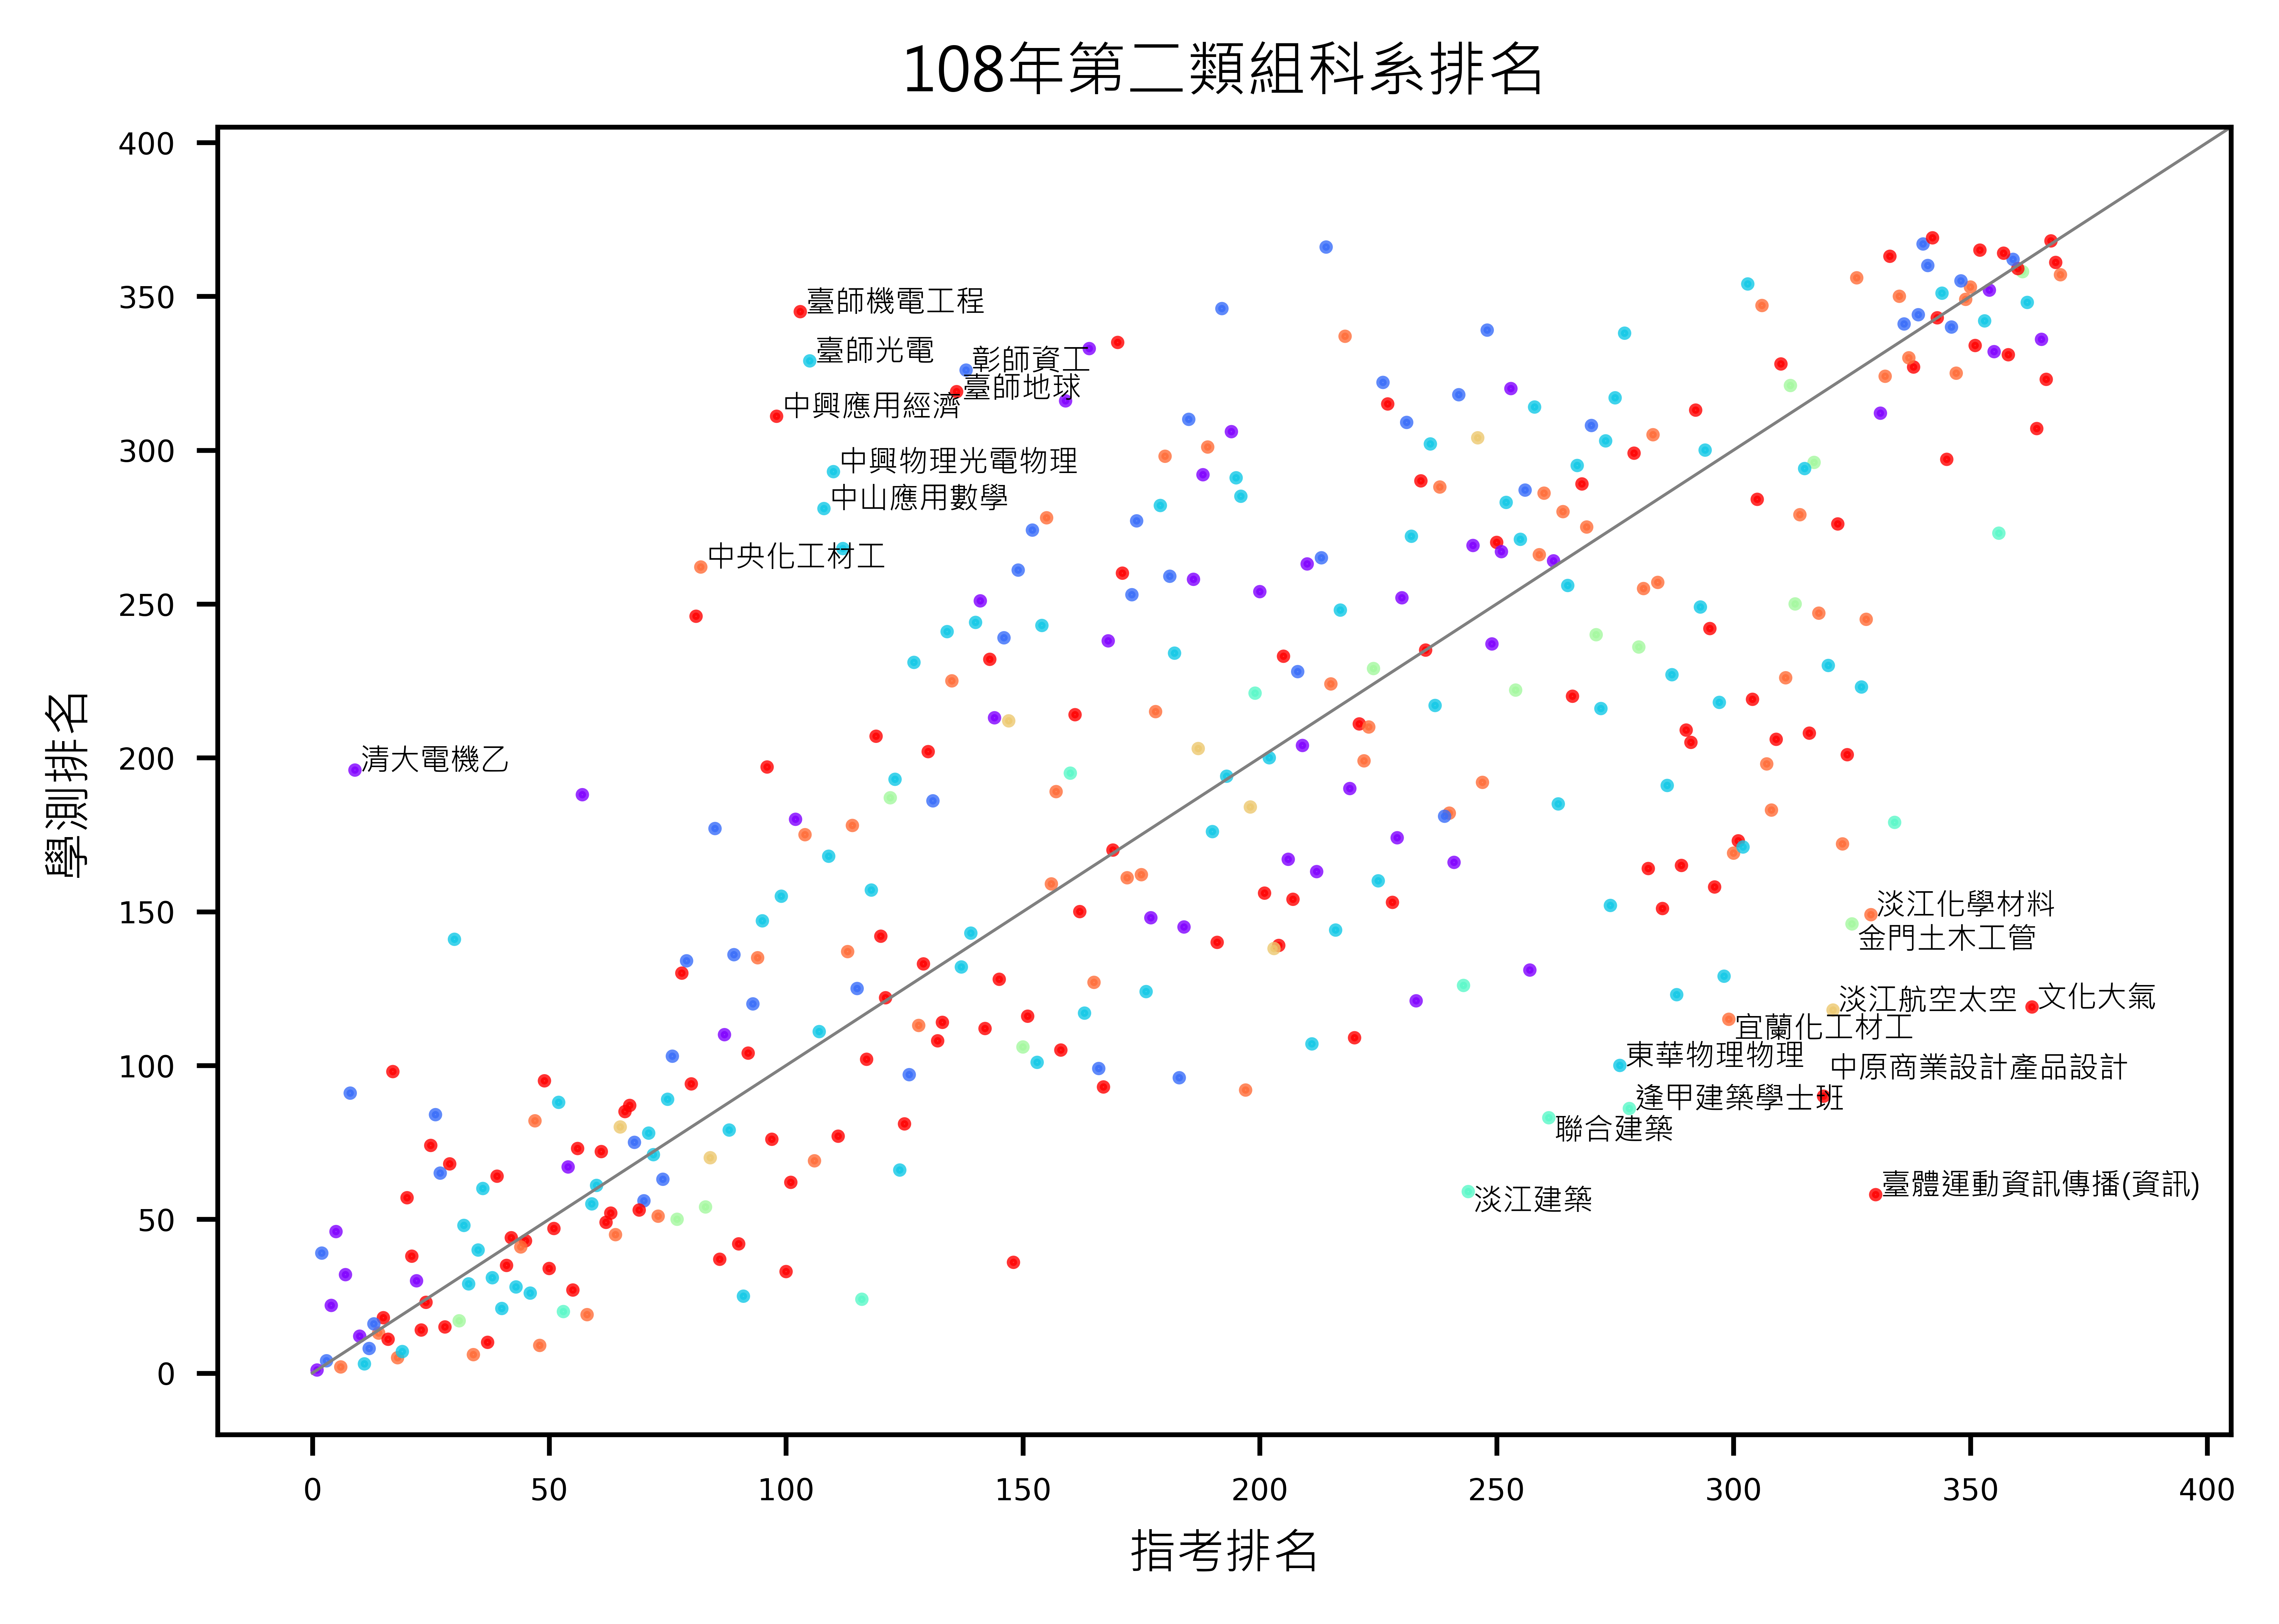

In [7]:
import pandas as pd

department_ds = pd.read_csv('108cat2.csv', encoding="utf-8", dtype=str) 
depname_abbr = department_ds['depname_abbr'] 
des_rank1 = department_ds['des_class_rank1'] 
basic_rank = department_ds['basic_class_rank'] 
dep_color = department_ds['category_my']    #school:學校, category:系所類別
ndep = department_ds.shape[0] 


category_df = dep_color.drop_duplicates().sort_values()
ncategory = category_df.shape[0]
colors = plt.cm.rainbow(np.linspace(0, 1, ncategory))

for i in range(ndep):
    dep_color[i] = colors[ int(dep_color[i])-1 ]

plot_result(3, des_rank1, basic_rank, depname_abbr, dep_color, addname = True, fontsize = 5, 
        title = '108年第二類組科系排名', markersize= 1.5, dpi = 1200, datascale = 1)

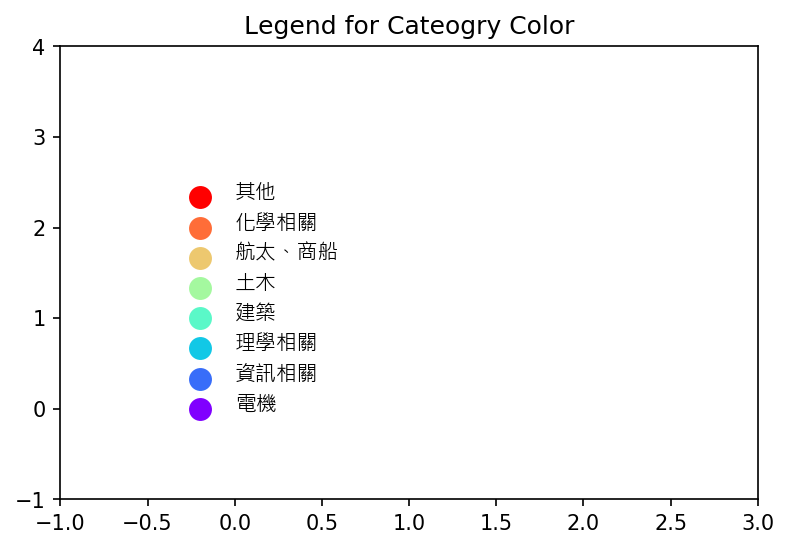

In [8]:
categoryName = ['電機', '資訊相關', '理學相關', '建築', '土木', '航太、商船', '化學相關', '其他']
fig, ax = plt.subplots(dpi = 150)
ax.set_title("Legend for Cateogry Color")

for i in range(category_df.shape[0]):
    thecolor = colors[i]
    ax.set_xlim([-1, 3])
    ax.set_ylim([-1, 4])
    x = -0.2
    y = i/3  
    ax.scatter(x, y, s = 100, color = thecolor)    
    ax.annotate(categoryName[i], (x+0.2, y-0.02), fontsize=10,  fontproperties=ChineseFont2)
plt.show()
